# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        
        #convert Kelvin to Celsius
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | hoemul-li
Processing Record 3 of Set 1 | palikir - national government center
Processing Record 4 of Set 1 | porto novo
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | bel ombre
Processing Record 7 of Set 1 | chicoana
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | gebeit
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | kingston
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | beau vallon
Processing Record 21 of Set 1 | camayenne
Processing Record 22 

Processing Record 38 of Set 4 | kurkino
Processing Record 39 of Set 4 | gardnerville ranchos
Processing Record 40 of Set 4 | kropp
Processing Record 41 of Set 4 | ballina
Processing Record 42 of Set 4 | conceicao do araguaia
Processing Record 43 of Set 4 | paraiso
Processing Record 44 of Set 4 | huron
Processing Record 45 of Set 4 | enewetak
Processing Record 46 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 47 of Set 4 | tazovsky
Processing Record 48 of Set 4 | hoxtolgay
City not found. Skipping...
Processing Record 49 of Set 4 | yauya
Processing Record 0 of Set 5 | luderitz
Processing Record 1 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 2 of Set 5 | punta arenas
Processing Record 3 of Set 5 | cole harbour
Processing Record 4 of Set 5 | buala
Processing Record 5 of Set 5 | troitsko-pechorsk
Processing Record 6 of Set 5 | freetown
Processing Record 7 of Set 5 | cherdyn'
Processing Record 8 of Set 5 | nagqu
Processing Record 9 of Set 5 | puer

Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | phongsali
Processing Record 35 of Set 8 | rakops
Processing Record 36 of Set 8 | lebyazh'ye
Processing Record 37 of Set 8 | fort st. john
Processing Record 38 of Set 8 | aswan
Processing Record 39 of Set 8 | vung tau
Processing Record 40 of Set 8 | bardai
Processing Record 41 of Set 8 | kankanhalli
Processing Record 42 of Set 8 | peshtera
Processing Record 43 of Set 8 | nadi
Processing Record 44 of Set 8 | jodhpur
Processing Record 45 of Set 8 | rio verde
Processing Record 46 of Set 8 | tres arroyos
Processing Record 47 of Set 8 | margherita
Processing Record 48 of Set 8 | buka
Processing Record 49 of Set 8 | bodaybo
Processing Record 0 of Set 9 | kapuskasing
Processing Record 1 of Set 9 | puerto madryn
Processing Record 2 of Set 9 | new norfolk
Processing Record 3 of Set 9 | korhogo
Processing Record 4 of Set 9 | songea
Processing Record 5 of Set 9 | akureyri
Processing Record 6 of Set 9 | el bolson
Processing Reco

Processing Record 22 of Set 12 | barah
Processing Record 23 of Set 12 | egilsstadir
Processing Record 24 of Set 12 | kirensk
Processing Record 25 of Set 12 | berane
Processing Record 26 of Set 12 | maiwut
City not found. Skipping...
Processing Record 27 of Set 12 | tisul'
Processing Record 28 of Set 12 | taoudenni
Processing Record 29 of Set 12 | el porvenir
Processing Record 30 of Set 12 | tobi village
City not found. Skipping...
Processing Record 31 of Set 12 | barentu
Processing Record 32 of Set 12 | malpica
Processing Record 33 of Set 12 | tsiolkovskiy
City not found. Skipping...
Processing Record 34 of Set 12 | zeya
Processing Record 35 of Set 12 | maua
Processing Record 36 of Set 12 | kruisfontein
Processing Record 37 of Set 12 | okondja
Processing Record 38 of Set 12 | ilorin
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,7.85,81,75,2.06,CA,1690392031
1,hoemul-li,41.4339,129.6700,22.47,88,100,1.60,KP,1690392037
2,palikir - national government center,6.9248,158.1611,27.00,82,100,6.62,FM,1690392146
3,porto novo,6.4965,2.6036,26.89,77,67,4.52,BJ,1690392154
4,lebu,-37.6167,-73.6500,10.04,76,100,2.45,CL,1690392156


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
DAY_OF_DATA_COLLECTION = "2023-07-26"

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,7.85,81,75,2.06,CA,1690392031
1,hoemul-li,41.4339,129.6700,22.47,88,100,1.60,KP,1690392037
2,palikir - national government center,6.9248,158.1611,27.00,82,100,6.62,FM,1690392146
3,porto novo,6.4965,2.6036,26.89,77,67,4.52,BJ,1690392154
4,lebu,-37.6167,-73.6500,10.04,76,100,2.45,CL,1690392156


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

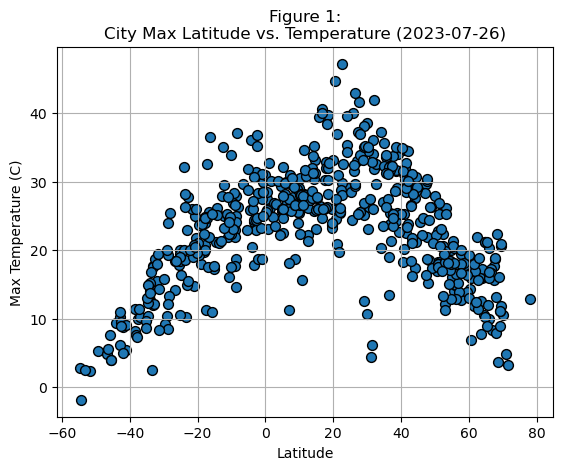

In [16]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Max Temp',
                  xlabel='Latitude', 
                  ylabel='Max Temperature (C)',
                  title=f"Figure 1:\nCity Max Latitude vs. Temperature ({DAY_OF_DATA_COLLECTION})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

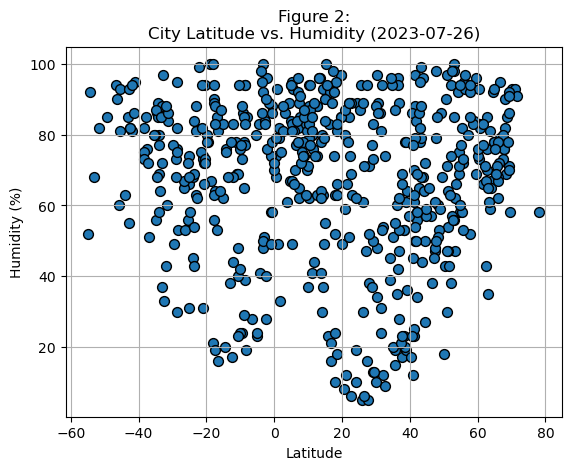

In [17]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Humidity',
                  xlabel='Latitude', 
                  ylabel='Humidity (%)',
                  title=f"Figure 2:\nCity Latitude vs. Humidity ({DAY_OF_DATA_COLLECTION})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

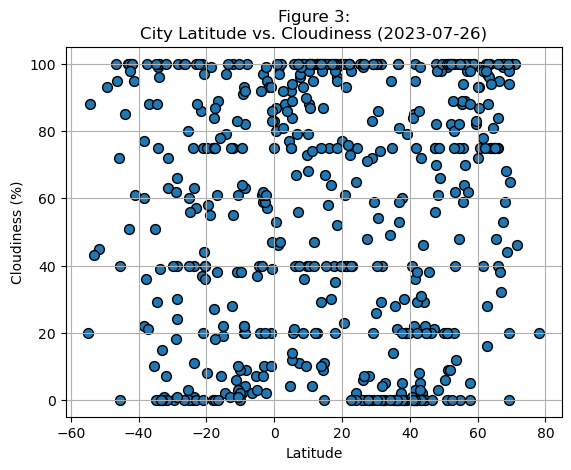

In [18]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Cloudiness',
                  xlabel='Latitude', 
                  ylabel='Cloudiness (%)',
                  title=f"Figure 3:\nCity Latitude vs. Cloudiness ({DAY_OF_DATA_COLLECTION})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

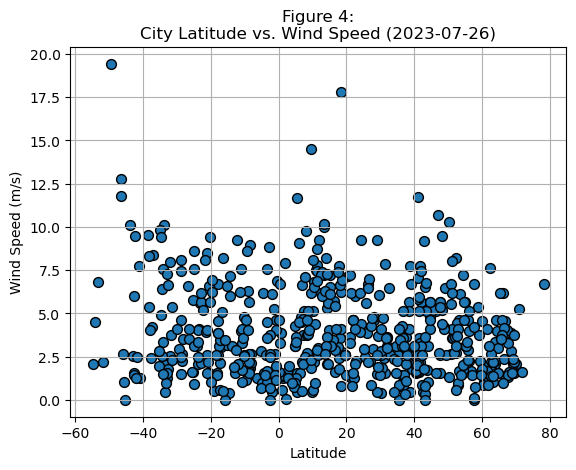

In [19]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Wind Speed',
                  xlabel='Latitude', 
                  ylabel='Wind Speed (m/s)',
                  title=f"Figure 4:\nCity Latitude vs. Wind Speed ({DAY_OF_DATA_COLLECTION})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linearRegression(df, x, y, xAnno, yAnno, xlabel, ylabel, figureNumber, title):#, xlabel, ylabel, title):
    (m, yIntercept, r, p, std) = linregress(df[x], df[y])
    linStr = f'y = {m:.2f}x + {yIntercept:.2f}'
    yLineValues = m * df[x] + yIntercept
    
    print(f'The r-value is: {r}')
    
    title = title.replace("Figure:", f"Figure {figureNumber}:")
    
    df.plot(kind='scatter', 
              x= x, 
              y= y,
              xlabel=xlabel,
              ylabel=ylabel,
              title= title,
              s=50
             )

    # Incorporate the other graph properties
    plt.plot(df[x], yLineValues, color='red')
    plt.annotate(linStr, (xAnno, yAnno), color = 'red', fontsize=14)

    # Save the figure
    plt.savefig(f"output_data/Fig{figureNumber}.png")

    # Show plot
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,7.85,81,75,2.06,CA,1690392031
1,hoemul-li,41.4339,129.6700,22.47,88,100,1.60,KP,1690392037
2,palikir - national government center,6.9248,158.1611,27.00,82,100,6.62,FM,1690392146
3,porto novo,6.4965,2.6036,26.89,77,67,4.52,BJ,1690392154
10,ribeira grande,38.5167,-28.7000,24.32,78,20,5.66,PT,1690392161


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,lebu,-37.6167,-73.6500,10.04,76,100,2.45,CL,1690392156
5,bel ombre,-4.6167,55.4167,25.91,83,40,6.17,SC,1690392159
6,chicoana,-25.1009,-65.5331,20.03,31,1,1.63,AR,1690392159
7,port-aux-francais,-49.3500,70.2167,5.30,85,93,19.42,TF,1690392160
8,puerto natales,-51.7236,-72.4875,2.40,82,45,2.19,CL,1690392160


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5952614296999946


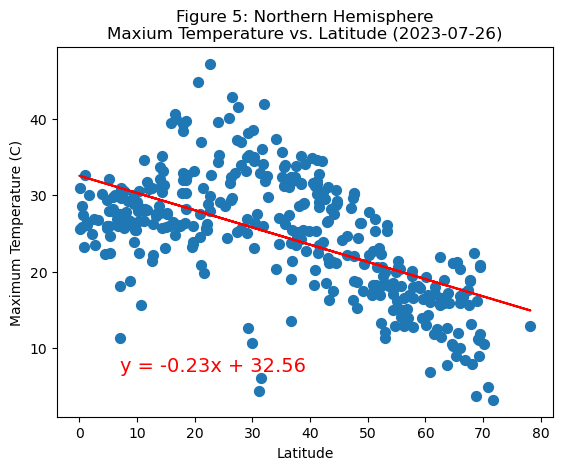

In [23]:
# Linear regression on Northern Hemisphere
linregdata = linearRegression(northern_hemi_df, 'Lat', 'Max Temp', 7, 7,  'Latitude', 'Maximum Temperature (C)', 5, f"Figure: Northern Hemisphere\nMaxium Temperature vs. Latitude ({DAY_OF_DATA_COLLECTION})")



The r-value is: 0.8162557491082201


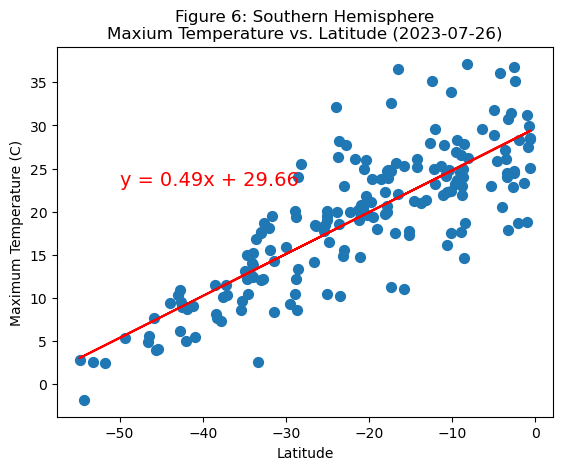

In [24]:
# Linear regression on Southern Hemisphere
linregdata = linearRegression(southern_hemi_df, 'Lat', 'Max Temp', -50, 23, 'Latitude', 'Maximum Temperature (C)', 6, f"Figure: Southern Hemisphere\nMaxium Temperature vs. Latitude ({DAY_OF_DATA_COLLECTION})")

**Discussion about the linear relationship:** 

### Pearson's R Coefficient:
In the northern hemisphere, Pearson's R coefficient is -0.60 which shows that there is a negative correlation between maximum temperature and latitude. And in the southern hemisphere, Pearson's R coefficient is 0.82 which shows that there is a positive correlation between maximum temperature and latitude. This corresponds quite well with our basic intuition that the further one gets from the equator, the cooler the maximum temperature is (i.e. roughly, the higher the absolute value of latitude the cooler the climate). 
<br>
However, also notice that Pearson's R coefficient is 35% greater in magnitude in the southern hemisphere, which is perhaps in large part due to the day of data collection was on July 26, 2023 (weeks after the summer solstice) which is summertime in the northern hemisphere and the sun is closest to the earth at a latitude of approximately 22&#176;N in latitude. Figure 5 roughly shows this in that there is an upward trend in the data between 0&#176; latitude and 22&#176;N latitude.

### Celsius To Latitude Rate Of Change (Line Slope):
Similarly and relatedly (but not surprisingly), the northern hemisphere has a -0.23&#176;C/&#176;Lat rate of change (see Figure 5) whereas the southern hemisphere has a 0.49&#176;C/&#176;Lat rate of change (see Figure 6) which is approximately 88% higher in absolute value. This is also likely due to the fact that the closest latitude to the sun is 22&#176;N latitude as mentioned above. And so, similar to the conversation about Pearson's R coefficient magnitude discrepancy between northern and southern hemispheres, the magnitude of the slope of the linear regression line in the northern hemisphere is reduced significantly as well by the upward trend in data between 0&#176; and 22&#176;N latitude even though the overall slope is still negative.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01065117237455118


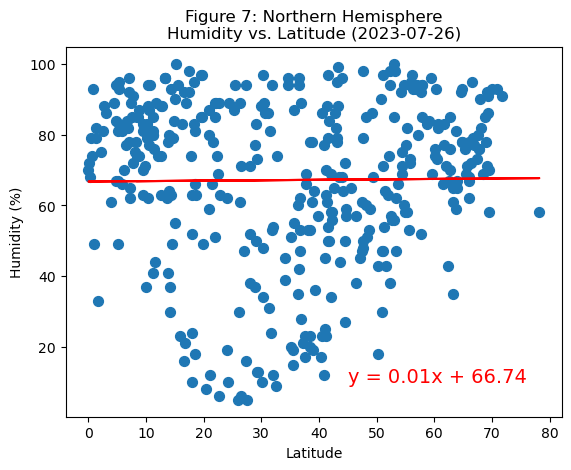

In [37]:
# Northern Hemisphere
linregdata = linearRegression(northern_hemi_df, 'Lat', 'Humidity', 45, 10,  'Latitude', 'Humidity (%)', 7, f"Figure: Northern Hemisphere\nHumidity vs. Latitude ({DAY_OF_DATA_COLLECTION})")


The r-value is: -0.17753591124235102


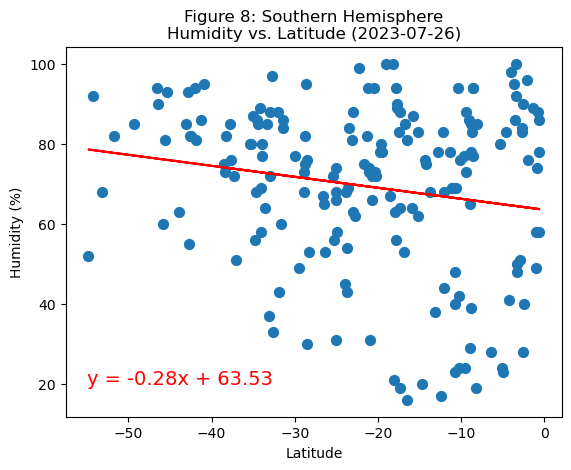

In [38]:
# Southern Hemisphere
linregdata = linearRegression(southern_hemi_df, 'Lat', 'Humidity', -55, 20,  'Latitude', 'Humidity (%)', 8, f"Figure: Southern Hemisphere\nHumidity vs. Latitude ({DAY_OF_DATA_COLLECTION})")


**Discussion about the linear relationship:**
### Pearson's R Coefficient:
In the northern hemisphere, Pearson's R coefficient of 0.01 suggests no correlation between humidity and latitude. And the slope of the linear regression line reflects this in value being a positive 0.01%Humidty/&#176;Lat making the line very flat.<br>
In the southern hemisphere, Pearson's R coefficient of -0.18 also suggests a very weak but negative correlation between humidity and latitude. And the slope of the linear regression line reflects this in value being a negative -0.28%Humidty/&#176;Lat making the line slightly less flat but almost flat.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04304218905842379


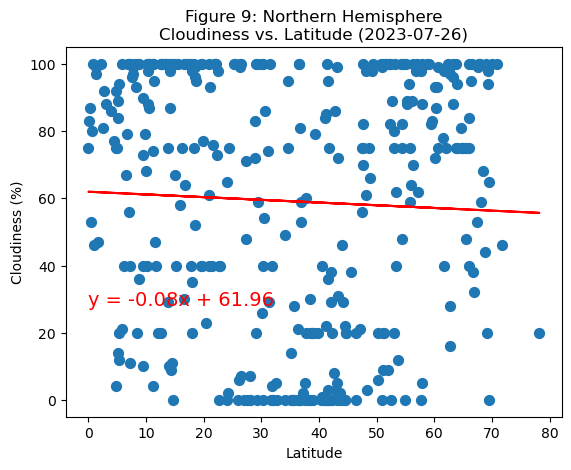

In [39]:
# Northern Hemisphere
linregdata = linearRegression(northern_hemi_df, 'Lat', 'Cloudiness', 0, 28,  'Latitude', 'Cloudiness (%)', 9, f"Figure: Northern Hemisphere\nCloudiness vs. Latitude ({DAY_OF_DATA_COLLECTION})")


The r-value is: -0.12121881468103651


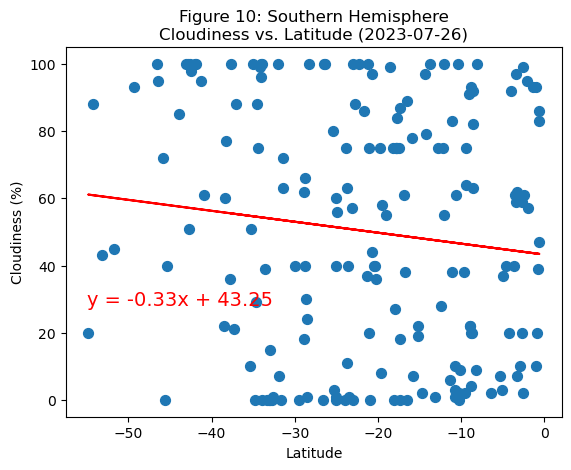

In [40]:
# Southern Hemisphere
linregdata = linearRegression(southern_hemi_df, 'Lat', 'Cloudiness', -55, 28,  'Latitude', 'Cloudiness (%)', 10, f"Figure: Southern Hemisphere\nCloudiness vs. Latitude ({DAY_OF_DATA_COLLECTION})")


**Discussion about the linear relationship:** 
### Pearson's R Coefficient:¶
In the northern hemisphere, Pearson's R coefficient of -0.04 suggests a very weak but negative correlation between cloudiness and latitude. And the slope of the linear regression line reflects this in value being a negative 0.08%Cloudiness/°Lat making the line very flat.<br>
In the southern hemisphere, Pearson's R coefficient of -0.12 also suggests a very weak but negative correlation between cloudiness and latitude. And the slope of the linear regression line reflects this in value being a negative -0.33%Cloudiness/°Lat making the line very flat.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.17729493682884193


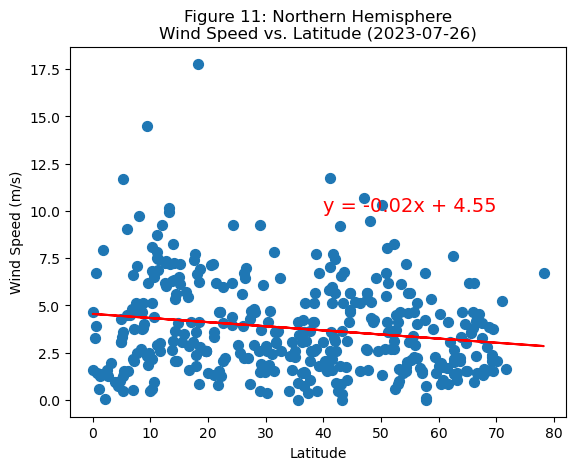

In [41]:
# Northern Hemisphere
linregdata = linearRegression(northern_hemi_df, 'Lat', 'Wind Speed', 40, 10,  'Latitude', 'Wind Speed (m/s)', 11, f"Figure: Northern Hemisphere\nWind Speed vs. Latitude ({DAY_OF_DATA_COLLECTION})")


The r-value is: -0.24214563302385966


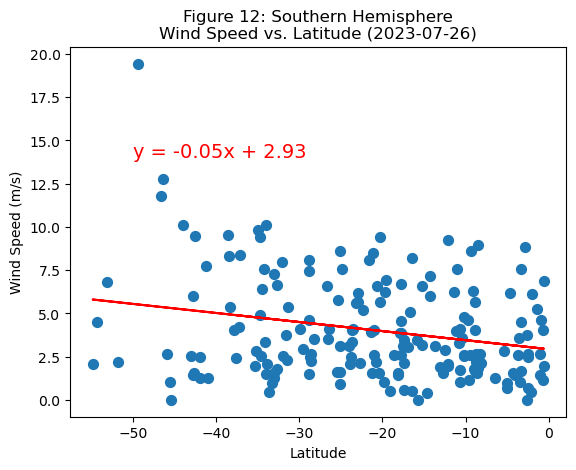

In [42]:
# Southern Hemisphere
linregdata = linearRegression(southern_hemi_df, 'Lat', 'Wind Speed', -50, 14,  'Latitude', 'Wind Speed (m/s)', 12, f"Figure: Southern Hemisphere\nWind Speed vs. Latitude ({DAY_OF_DATA_COLLECTION})")


**Discussion about the linear relationship:** 
### Pearson's R Coefficient:¶
In the northern hemisphere, Pearson's R coefficient of -0.18 suggests a very weak but negative correlation between Wind Speed and latitude. And the slope of the linear regression line reflects this in value being a negative 0.02m/s Wind Speed per °Lat making the line very flat.<br>
In the southern hemisphere, Pearson's R coefficient of -0.24 also suggests a very weak but negative correlation between cloudiness and latitude. And the slope of the linear regression line reflects this in value being a negative -0.05m/s Wind Speed per °Lat making the line very flat.